In [27]:
# G1 Capstone Project_Stat

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
retail_df = pd.read_csv('D:\Data Science bootcamp\Git\stat_capstone\synthetic_retail_data.csv')
print(retail_df.head())

   InvoiceNo CustomerID      Date ProductCategory  Quantity  UnitPrice  \
0  INV105646   CUST1810  1/1/2023            Home         7      67.88   
1  INV105099   CUST1530  1/1/2023            Toys         6      24.22   
2  INV102818   CUST1701  1/1/2023     Electronics         6     158.78   
3  INV107351   CUST1323  1/1/2023     Electronics         5     102.23   
4  INV108415   CUST1406  1/1/2023     Electronics         8      62.32   

   DiscountApplied  ReviewRating  IsFirstPurchase MarketingChannel  ...  \
0             44.6           4.0                0          Organic  ...   
1              0.0           2.0                1           Social  ...   
2             25.9           5.0                1            Email  ...   
3             39.0           3.0                1           Social  ...   
4             26.7           4.0                0            Email  ...   

  ItemsInCart  PreviousSpending  BrowsingSessions  TotalAmount  Unnamed: 17  \
0           7            

In [30]:
print(retail_df.info())
print(retail_df.describe().T)
print(retail_df.isnull().sum())
print(retail_df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InvoiceNo         9500 non-null   object 
 1   CustomerID        9500 non-null   object 
 2   Date              9500 non-null   object 
 3   ProductCategory   9500 non-null   object 
 4   Quantity          9500 non-null   int64  
 5   UnitPrice         9500 non-null   float64
 6   DiscountApplied   9500 non-null   float64
 7   ReviewRating      7835 non-null   float64
 8   IsFirstPurchase   9500 non-null   int64  
 9   MarketingChannel  9028 non-null   object 
 10  Country           9500 non-null   object 
 11  TimeOnSite        9025 non-null   float64
 12  ShippingCost      9500 non-null   float64
 13  ItemsInCart       9500 non-null   int64  
 14  PreviousSpending  9500 non-null   float64
 15  BrowsingSessions  9500 non-null   int64  
 16  TotalAmount       9500 non-null   float64


Import and examine the dataset.
Identify missing values and apply appropriate treatment.
Detect and address outliers in dataset.
Prepare data for analysis and modeling.

Dropping duplicates (if any)

In [31]:
retail_df.drop_duplicates(inplace=True)

In [32]:
print(retail_df.describe().T)

                   count        mean          std    min       25%        50%  \
Quantity          9500.0    9.166105     5.267773   1.00    6.0000    9.00000   
UnitPrice         9500.0   58.459586    42.140771  10.06   31.3500   43.67500   
DiscountApplied   9500.0   18.181400    18.531475   0.00    0.0000   13.60000   
ReviewRating      7835.0    3.481302     1.062269   1.00    3.0000    4.00000   
IsFirstPurchase   9500.0    0.302842     0.459512   0.00    0.0000    0.00000   
TimeOnSite        9025.0  299.567878   118.555281  30.00  218.9000  296.80000   
ShippingCost      9500.0   10.041306     4.875580   0.00    6.6300    9.96000   
ItemsInCart       9500.0    9.671474     3.528830   1.00    7.0000    9.00000   
PreviousSpending  9500.0  209.090296   161.318720   0.00    0.0000  241.93000   
BrowsingSessions  9500.0    3.064737     1.440587   1.00    2.0000    3.00000   
TotalAmount       9500.0  484.463016   940.646765  20.26  199.9175  309.13500   
Unnamed: 17          0.0    

In [33]:
print(retail_df.columns)

Index(['InvoiceNo', 'CustomerID', 'Date', 'ProductCategory', 'Quantity',
       'UnitPrice', 'DiscountApplied', 'ReviewRating', 'IsFirstPurchase',
       'MarketingChannel', 'Country', 'TimeOnSite', 'ShippingCost',
       'ItemsInCart', 'PreviousSpending', 'BrowsingSessions', 'TotalAmount',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')


In [34]:
print(retail_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InvoiceNo         9500 non-null   object 
 1   CustomerID        9500 non-null   object 
 2   Date              9500 non-null   object 
 3   ProductCategory   9500 non-null   object 
 4   Quantity          9500 non-null   int64  
 5   UnitPrice         9500 non-null   float64
 6   DiscountApplied   9500 non-null   float64
 7   ReviewRating      7835 non-null   float64
 8   IsFirstPurchase   9500 non-null   int64  
 9   MarketingChannel  9028 non-null   object 
 10  Country           9500 non-null   object 
 11  TimeOnSite        9025 non-null   float64
 12  ShippingCost      9500 non-null   float64
 13  ItemsInCart       9500 non-null   int64  
 14  PreviousSpending  9500 non-null   float64
 15  BrowsingSessions  9500 non-null   int64  
 16  TotalAmount       9500 non-null   float64


In [35]:
print(retail_df.isnull().sum())

InvoiceNo              0
CustomerID             0
Date                   0
ProductCategory        0
Quantity               0
UnitPrice              0
DiscountApplied        0
ReviewRating        1665
IsFirstPurchase        0
MarketingChannel     472
Country                0
TimeOnSite           475
ShippingCost           0
ItemsInCart            0
PreviousSpending       0
BrowsingSessions       0
TotalAmount            0
Unnamed: 17         9500
Unnamed: 18         8271
Unnamed: 19         9500
Unnamed: 20         8271
Unnamed: 21         8271
Unnamed: 22         8271
dtype: int64


In [36]:
# printing variables with missing values
missing_col = [col for col in retail_df.columns if retail_df[col].isnull().sum()>0]
print(missing_col)

['ReviewRating', 'MarketingChannel', 'TimeOnSite', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22']


In [37]:
# printing variables with no value
no_value_col = [col for col in retail_df.columns if retail_df[col].isnull().sum()==retail_df.shape[0]]
print(no_value_col)

['Unnamed: 17', 'Unnamed: 19']


In [38]:
# remove the two columns with no values
retail_df.drop(columns=no_value_col, inplace=True)

In [39]:
print(retail_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InvoiceNo         9500 non-null   object 
 1   CustomerID        9500 non-null   object 
 2   Date              9500 non-null   object 
 3   ProductCategory   9500 non-null   object 
 4   Quantity          9500 non-null   int64  
 5   UnitPrice         9500 non-null   float64
 6   DiscountApplied   9500 non-null   float64
 7   ReviewRating      7835 non-null   float64
 8   IsFirstPurchase   9500 non-null   int64  
 9   MarketingChannel  9028 non-null   object 
 10  Country           9500 non-null   object 
 11  TimeOnSite        9025 non-null   float64
 12  ShippingCost      9500 non-null   float64
 13  ItemsInCart       9500 non-null   int64  
 14  PreviousSpending  9500 non-null   float64
 15  BrowsingSessions  9500 non-null   int64  
 16  TotalAmount       9500 non-null   float64


In [41]:
#list of variables with missing values with total number of missing values 
missing_col = {col: retail_df[col].isnull().sum() for col in retail_df.columns if retail_df[col].isnull().sum()>0}
print(missing_col)

{'ReviewRating': np.int64(1665), 'MarketingChannel': np.int64(472), 'TimeOnSite': np.int64(475), 'Unnamed: 18': np.int64(8271), 'Unnamed: 20': np.int64(8271), 'Unnamed: 21': np.int64(8271), 'Unnamed: 22': np.int64(8271)}


Considering the size of the data, four of which doesn't seem to have adequate sample size. I believe we can exclude it from the analysis. (unnamed 18, 20, 21, 22)

In [42]:
# removme columns with too many missing values
retail_df.drop(columns=['Unnamed: 18', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'], inplace=True)
print(retail_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InvoiceNo         9500 non-null   object 
 1   CustomerID        9500 non-null   object 
 2   Date              9500 non-null   object 
 3   ProductCategory   9500 non-null   object 
 4   Quantity          9500 non-null   int64  
 5   UnitPrice         9500 non-null   float64
 6   DiscountApplied   9500 non-null   float64
 7   ReviewRating      7835 non-null   float64
 8   IsFirstPurchase   9500 non-null   int64  
 9   MarketingChannel  9028 non-null   object 
 10  Country           9500 non-null   object 
 11  TimeOnSite        9025 non-null   float64
 12  ShippingCost      9500 non-null   float64
 13  ItemsInCart       9500 non-null   int64  
 14  PreviousSpending  9500 non-null   float64
 15  BrowsingSessions  9500 non-null   int64  
 16  TotalAmount       9500 non-null   float64


In [44]:
final_missing_col = {col: retail_df[col].isnull().sum() for col in retail_df.columns if retail_df[col].isnull().sum()>0}
print(final_missing_col)

{'ReviewRating': np.int64(1665), 'MarketingChannel': np.int64(472), 'TimeOnSite': np.int64(475)}


In [51]:
# print characteristic of the three columns with missing values
print(retail_df['ReviewRating'].describe())
print(retail_df['MarketingChannel'].describe()) 
print(retail_df['TimeOnSite'].describe())     

count    7835.000000
mean        3.481302
std         1.062269
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: ReviewRating, dtype: float64
count      9028
unique        5
top       Email
freq       2768
Name: MarketingChannel, dtype: object
count    9025.000000
mean      299.567878
std       118.555281
min        30.000000
25%       218.900000
50%       296.800000
75%       379.800000
max       739.100000
Name: TimeOnSite, dtype: float64


In [53]:
print(retail_df['ReviewRating'].describe())
print(retail_df['ReviewRating'].info())
print("Mode", retail_df['ReviewRating'].mode())
print("Median", retail_df['ReviewRating'].median())


count    7835.000000
mean        3.481302
std         1.062269
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: ReviewRating, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 9500 entries, 0 to 9499
Series name: ReviewRating
Non-Null Count  Dtype  
--------------  -----  
7835 non-null   float64
dtypes: float64(1)
memory usage: 74.3 KB
None
Mode 0    4.0
Name: ReviewRating, dtype: float64
Median 4.0


In [55]:
# Both median and mode are 4.0. We will replace the missing values with 4.0 in Review rating. 
retail_df['ReviewRating'].fillna(4.0)

0       4.0
1       2.0
2       5.0
3       3.0
4       4.0
       ... 
9495    4.0
9496    4.0
9497    4.0
9498    4.0
9499    3.0
Name: ReviewRating, Length: 9500, dtype: float64

In [57]:
print(retail_df["ReviewRating"].isnull().sum())

0


In [58]:
print(retail_df["ReviewRating"].info())

<class 'pandas.core.series.Series'>
RangeIndex: 9500 entries, 0 to 9499
Series name: ReviewRating
Non-Null Count  Dtype  
--------------  -----  
9500 non-null   float64
dtypes: float64(1)
memory usage: 74.3 KB
None


In [60]:
print(retail_df["MarketingChannel"].info())

<class 'pandas.core.series.Series'>
RangeIndex: 9500 entries, 0 to 9499
Series name: MarketingChannel
Non-Null Count  Dtype 
--------------  ----- 
9028 non-null   object
dtypes: object(1)
memory usage: 74.3+ KB
None


In [61]:
print(retail_df["MarketingChannel"].describe())

count      9028
unique        5
top       Email
freq       2768
Name: MarketingChannel, dtype: object


In [62]:
print(retail_df["MarketingChannel"].mode())

0    Email
Name: MarketingChannel, dtype: object


In [76]:
# replace missing value with mode "Email" in MarketingChannel
retail_df["MarketingChannel"]= retail_df["MarketingChannel"].fillna("Email")


In [64]:
print(retail_df["TimeOnSite"].info())
print(retail_df["TimeOnSite"].describe())
print(retail_df["TimeOnSite"].mode())

<class 'pandas.core.series.Series'>
RangeIndex: 9500 entries, 0 to 9499
Series name: TimeOnSite
Non-Null Count  Dtype  
--------------  -----  
9025 non-null   float64
dtypes: float64(1)
memory usage: 74.3 KB
None
count    9025.000000
mean      299.567878
std       118.555281
min        30.000000
25%       218.900000
50%       296.800000
75%       379.800000
max       739.100000
Name: TimeOnSite, dtype: float64
0    30.0
Name: TimeOnSite, dtype: float64


In [71]:
# calculate median and mode of TimeOnSite
print(retail_df["TimeOnSite"].median())
print(retail_df["TimeOnSite"].mode())

296.8
0    30.0
Name: TimeOnSite, dtype: float64


In [74]:
# we will replace the missing value with mean of the column inplace of it
retail_df["TimeOnSite"]=  retail_df["TimeOnSite"].fillna(retail_df["TimeOnSite"].mean())

In [77]:
#check if there is any missing value remaining 
print(retail_df.isnull().sum())

InvoiceNo           0
CustomerID          0
Date                0
ProductCategory     0
Quantity            0
UnitPrice           0
DiscountApplied     0
ReviewRating        0
IsFirstPurchase     0
MarketingChannel    0
Country             0
TimeOnSite          0
ShippingCost        0
ItemsInCart         0
PreviousSpending    0
BrowsingSessions    0
TotalAmount         0
dtype: int64


Detect and address outliers in dataset.
Prepare data for analysis and modeling.
Descriptive Statistics & Exploratory Analysis
Compute summary statistics (mean, median, mode, variance, standard deviation, IQR).
Generate distribution plots (histograms, boxplots, scatterplots).

In [78]:
# Outlier Detection and Treatment
numeric_cols = retail_df.select_dtypes(include=np.number).columns.tolist()
print(numeric_cols)

['Quantity', 'UnitPrice', 'DiscountApplied', 'ReviewRating', 'IsFirstPurchase', 'TimeOnSite', 'ShippingCost', 'ItemsInCart', 'PreviousSpending', 'BrowsingSessions', 'TotalAmount']


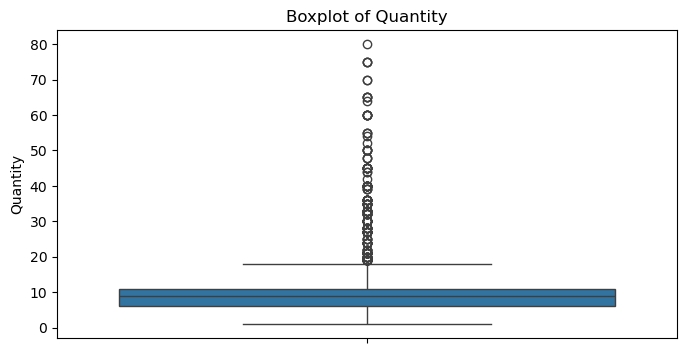

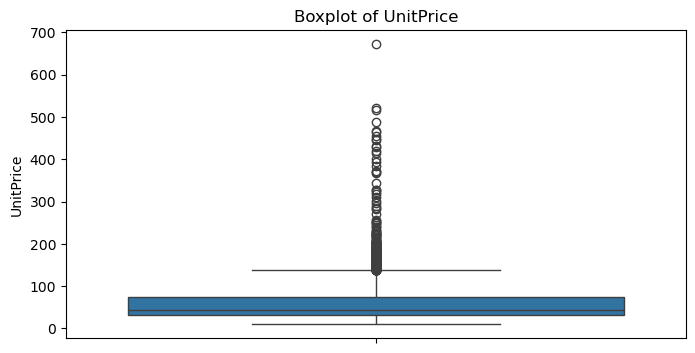

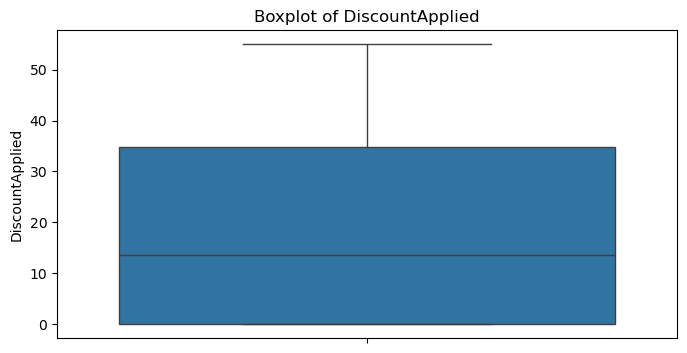

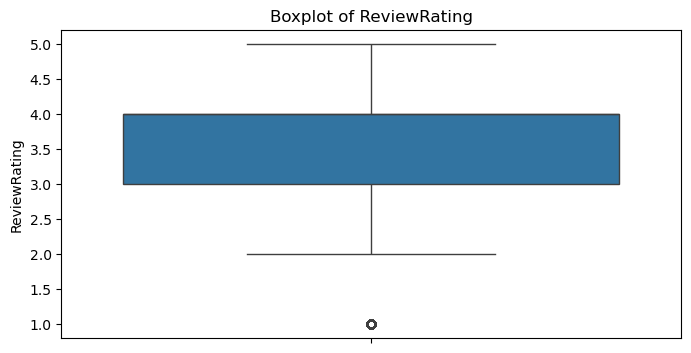

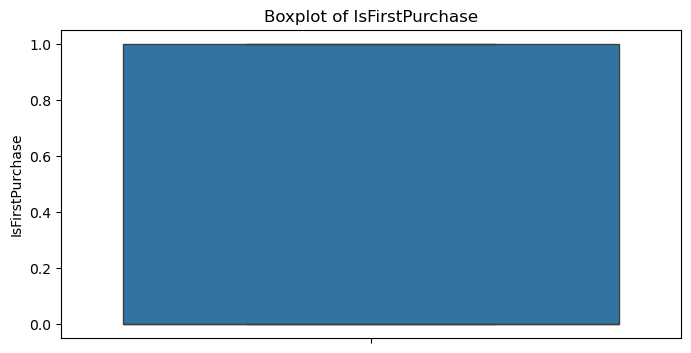

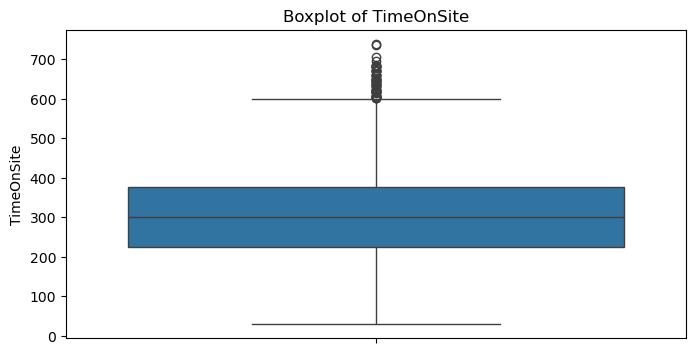

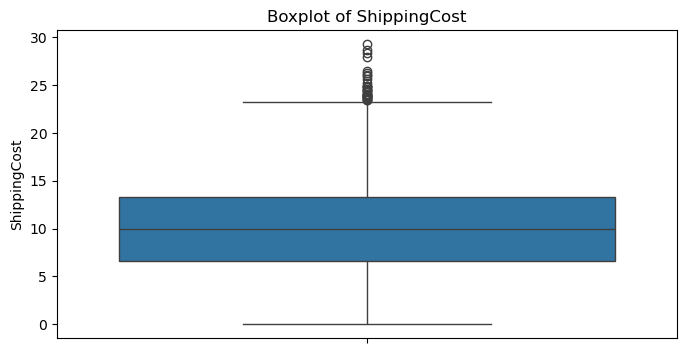

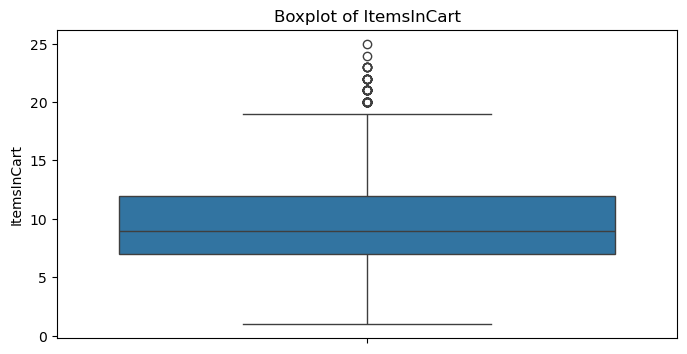

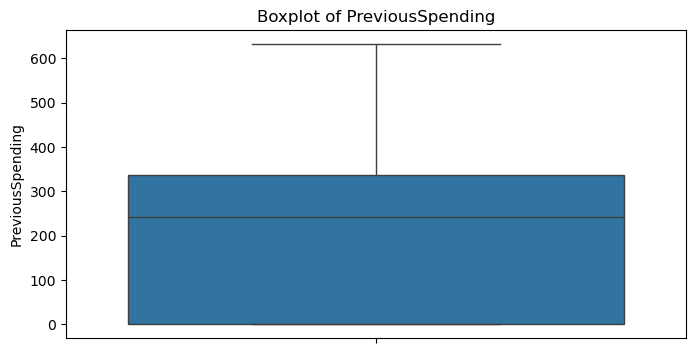

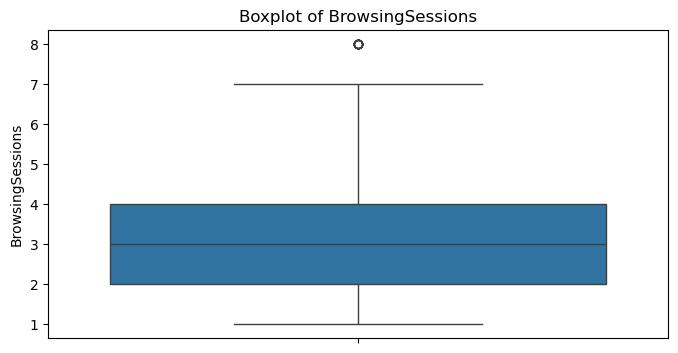

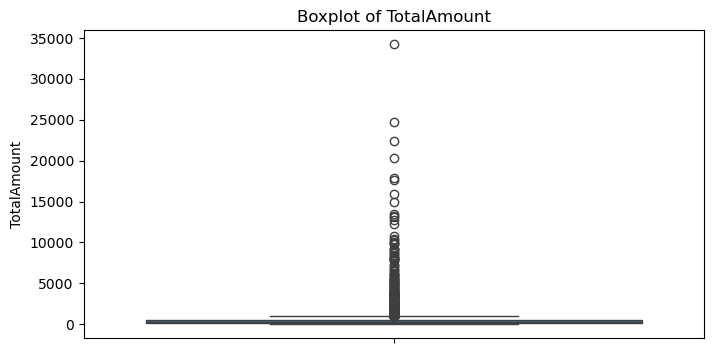

In [80]:
# boxplot for numerical columns
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(y=retail_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()